In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"pranathisreeja","key":"f74e844b8927ecd92b648f7262034cdd"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
fake-and-real-news-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fake-and-real-news-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import pandas as pd

df_fake = pd.read_csv('/content/Fake.csv')
df_true = pd.read_csv('/content/True.csv')
df_fake['label'] = 0
df_true['label'] = 1

In [6]:
df_fake.sample(5)

,title,text,subject,date,label
17263,[VIDEO] SHOULD RINOS AND DEMOCRATS FEAR TRUMP’...,Donald Trump announced he will be running for ...,Government News,"Jun 16, 2015",0
5004,KARMA: Anti-Gay Bigot Tony Perkins Gets Punis...,So if natural disasters are sent by God to pun...,News,"August 17, 2016",0
11466,CONSERVATIVES FIGHT BACK Against Proposed “Oba...,House Republicans leaders on Monday embraced a...,politics,"Mar 7, 2017",0
7215,Cruz Brutally Mocks Trump For Trying To Back ...,"Once again, Republican front runner Donald Tru...",News,"March 29, 2016",0
5400,People Who Read This Wildly Popular Book Are ...,Harry Potter books are among the best selling ...,News,"July 20, 2016",0


In [7]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [8]:
df_true.sample(5)

,title,text,subject,date,label
7161,China state media warn Trump against renouncin...,SHANGHAI (Reuters) - Chinese state media warne...,politicsNews,"November 19, 2016",1
19181,Six people believed injured in suspected Londo...,LONDON (Reuters) - Six people were believed to...,worldnews,"September 23, 2017",1
16554,Thailand kicks off sumptuous funeral of King B...,BANGKOK (Reuters) - Thailand on Wednesday mark...,worldnews,"October 25, 2017",1
1106,Tech companies to lobby for immigrant 'Dreamer...,SAN FRANCISCO (Reuters) - Nearly two dozen maj...,politicsNews,"October 20, 2017",1
11374,Egypt hangs 15 militants for killing security ...,CAIRO (Reuters) - Egypt hanged 15 men convicte...,worldnews,"December 26, 2017",1


In [9]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [10]:
df1_sample = df_fake.sample(2000)  # First 2000 rows of df1
df2_sample = df_true.sample(2000)  # First 2000 rows of df2

# Concatenate them together
df = pd.concat([df1_sample, df2_sample], ignore_index=True)

In [11]:
df

,title,text,subject,date,label
0,New York Gun License Broker Paid Off Cops To ...,Police have suspended the licenses of at least...,News,"May 15, 2016",0
1,THE VIEW WOMEN Go Off The Rails: Trump ‘has to...,,left-news,"Dec 12, 2016",0
2,DEADBEATS BEWARE: Trump’s Food Stamp Reform Is...,All we re hearing from the left is fear monger...,Government News,"May 26, 2017",0
3,WATCH: Giuliani’s BIG LIE At Trump Rally Is J...,Former New York City mayor Rudy Giuliani has b...,News,"August 15, 2016",0
4,WATCH: Don Lemon And CNN Panel Laugh At Trump...,One of Trump s minions just embarrassed hersel...,News,"October 22, 2016",0
...,...,...,...,...,...
3995,Keeping the competition out: Iran startups thr...,LONDON (Reuters) - Low on cash but high on hop...,worldnews,"October 6, 2017",1
3996,London mayor says Britain should not host Pres...,LONDON (Reuters) - London Mayor Sadiq Khan sai...,worldnews,"September 24, 2017",1
3997,Trump's defense chief visits UAE in first Midd...,ABU DHABI - U.S. President Donald Trump’s defe...,politicsNews,"February 18, 2017",1
3998,Republican Senator John McCain leaves Washingt...,WASHINGTON (Reuters) - Republican U.S. Senator...,politicsNews,"December 18, 2017",1


<Axes: xlabel='count', ylabel='subject'>

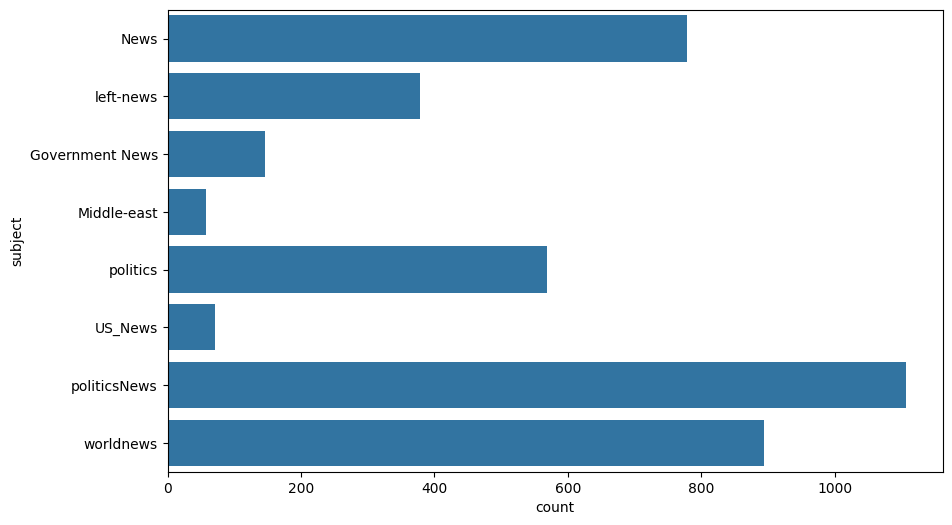

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(df['subject'])

In [13]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [14]:
# Download required NLTK data (only needed once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [15]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [16]:
# Helper function to convert POS tag to WordNet POS
from nltk import pos_tag

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default

In [17]:
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    pos_tags = pos_tag(tokens)
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]
    return ' '.join(lemmatized)  # Return as cleaned string

In [18]:
df['clean_text'] = df['text'].apply(preprocess)

df.sample(5)

,title,text,subject,date,label,clean_text
2100,Brady Campaign's ad draws ire of U.S. anti-gun...,BOSTON (Reuters) - The Brady Campaign to Preve...,politicsNews,"April 29, 2016",1,boston reuters brady campaign prevent gun viol...
3388,Obama officials work against time to wrap bank...,WASHINGTON (Reuters) - U.S. officials are stri...,politicsNews,"November 13, 2016",1,washington reuters official strive put finish ...
3574,Kurdish forces pullout from Khanaqin area on I...,BAGHDAD (Reuters) - Kurdish Peshmerga forces p...,worldnews,"October 17, 2017",1,baghdad reuters kurdish peshmerga force pull a...
2411,Mississippi lawmaker 'sorry' he urged lynching...,(Reuters) - A Mississippi state lawmaker who c...,politicsNews,"May 22, 2017",1,reuters mississippi state lawmaker call lynch ...
3425,The Reuters Graphic: The threat from Bali's an...,"(Reuters) - Mount Agung, a rumbling volcano to...",worldnews,"October 4, 2017",1,reuters mount agung rumble volcano tower east ...


In [19]:
df.drop(columns = ['text', 'subject', 'title', 'date'], inplace=True)
df.sample(5)

,label,clean_text
753,0,wannabe female bomber teacher day queen ny jih...
1581,0,washington post get call big time fake story p...
214,0,mother outrage autistic daughter come home tea...
3499,1,washington reuters president donald trump expe...
2762,1,washington reuters democrat hillary clinton ru...


In [20]:
from sklearn.model_selection import train_test_split

# First split into train and temp
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42, shuffle=True)

# Then split temp into validation and test
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42, shuffle=True)

In [21]:
from datasets import Dataset

# Rename for HuggingFace compatibility
train_ds = Dataset.from_pandas(train_df[['clean_text', 'label']].rename(columns={'clean_text': 'text'}))
val_ds = Dataset.from_pandas(val_df[['clean_text', 'label']].rename(columns={'clean_text': 'text'}))
test_ds = Dataset.from_pandas(test_df[['clean_text', 'label']].rename(columns={'clean_text': 'text'}))


In [22]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_fn(batch):
    return tokenizer(batch['text'], truncation=True, padding='max_length', max_length=256)

train_ds = train_ds.map(tokenize_fn, batched=True)
val_ds = val_ds.map(tokenize_fn, batched=True)
test_ds = test_ds.map(tokenize_fn, batched=True)

# Set format for PyTorch
train_ds.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
val_ds.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_ds.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/2800 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

In [28]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

training_args = TrainingArguments(
    output_dir='./bert-fake-news',
    do_train=True,
    do_eval=True,
    save_steps=500,
    eval_steps=500,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    report_to="none"  # 👈 this disables wandb and other loggers
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
!pip install numpy==1.26.4
import numpy as np
print(np.__version__)  # should now be 1.26.4

1.26.4


In [25]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


In [30]:
from transformers import TrainerCallback

class HistoryCallback(TrainerCallback):
    def __init__(self):
        self.history = {
            'loss': [],
            'eval_loss': [],
            'eval_accuracy': []
        }

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            if 'loss' in logs:
                self.history['loss'].append(logs['loss'])
            if 'eval_loss' in logs:
                self.history['eval_loss'].append(logs['eval_loss'])
            if 'eval_accuracy' in logs:
                self.history['eval_accuracy'].append(logs['eval_accuracy'])

history_cb = HistoryCallback()


In [31]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    compute_metrics=compute_metrics,  # if you want accuracy
    callbacks=[history_cb]
)

trainer.train()

Step,Training Loss
100,0.149500
200,0.016600
300,0.014800
400,0.000500
500,0.010500
600,0.015200
700,0.005700


TrainOutput(global_step=700, training_loss=0.03042421676750694, metrics={'train_runtime': 531.1499, 'train_samples_per_second': 21.086, 'train_steps_per_second': 1.318, 'total_flos': 1473421910016000.0, 'train_loss': 0.03042421676750694, 'epoch': 4.0})

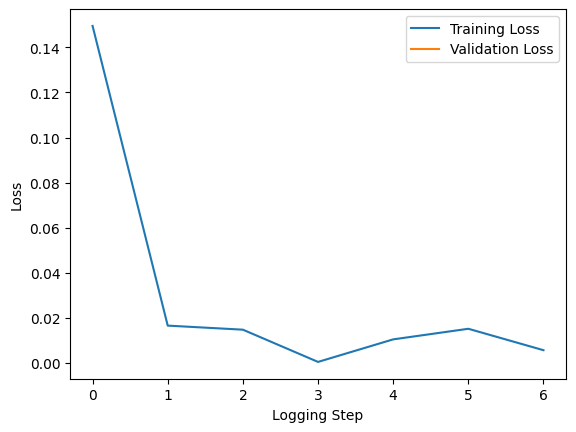

In [32]:
import matplotlib.pyplot as plt

plt.plot(history_cb.history['loss'], label='Training Loss')
plt.plot(history_cb.history['eval_loss'], label='Validation Loss')
plt.xlabel("Logging Step")
plt.ylabel("Loss")
plt.legend()
plt.show()

# If eval_accuracy is tracked
if history_cb.history['eval_accuracy']:
    plt.plot(history_cb.history['eval_accuracy'], label='Validation Accuracy', color='green')
    plt.xlabel("Logging Step")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [33]:
model.save_pretrained("./saved_bert_fake_news")
tokenizer.save_pretrained("./saved_bert_fake_news")

('./saved_bert_fake_news/tokenizer_config.json',
 './saved_bert_fake_news/special_tokens_map.json',
 './saved_bert_fake_news/vocab.txt',
 './saved_bert_fake_news/added_tokens.json')

In [34]:
results = trainer.evaluate(eval_dataset=test_ds)
results


{'eval_loss': 0.016070310026407242,
 'eval_accuracy': 0.995,
 'eval_precision': 0.9900990099009901,
 'eval_recall': 1.0,
 'eval_f1': 0.9950248756218906,
 'eval_runtime': 8.4649,
 'eval_samples_per_second': 70.881,
 'eval_steps_per_second': 4.489,
 'epoch': 4.0}